# Exercise 10-1: Create a linear regression

## Get the data

In [49]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
fish = pd.read_csv('Fish.csv')

In [51]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [52]:
# read the info.txt file and rename the Length columns so they're more descriptive
columns_to_rename = {
    'Length1': 'Vertical_Length',
    'Length2' : 'Diagonal_Length',
    'Length3' : 'Cross_Length'
}

fish = fish.rename(columns=columns_to_rename)
fish.head()

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation

In [53]:
# get the correlation data for the Weight column
corr_data = fish.corr()[['Weight']].sort_values(by='Weight', ascending=False)
corr_data

,Weight
Weight,1.000000
Cross_Length,0.923044
Diagonal_Length,0.918618
Vertical_Length,0.915712
Width,0.886507
Height,0.724345


<AxesSubplot:>

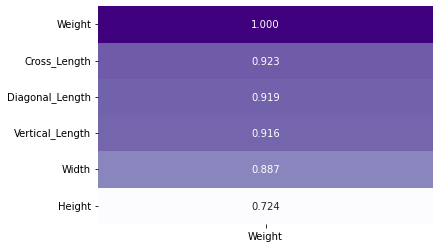

In [54]:
# create a heatmap for the correlation data
sns.heatmap(corr_data, cmap='Purples', cbar=False, annot=True, fmt=f'.3f')

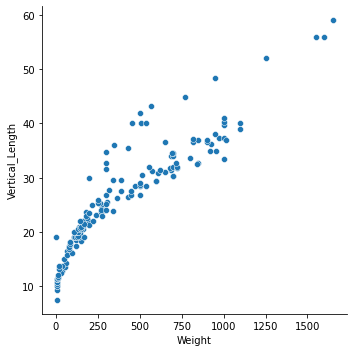

In [55]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=fish, kind='scatter', x='Weight', y='Vertical_Length')

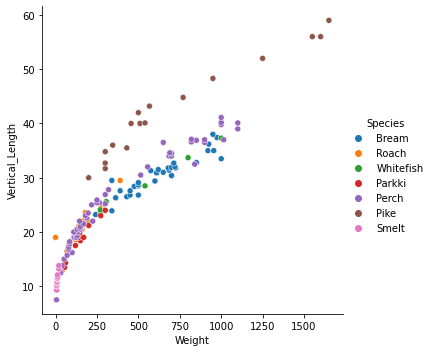

In [56]:
# create the same scatterplot as the previous cell, but use color to identify each species
sns.relplot(data=fish, kind='scatter', x='Weight', y='Vertical_Length', hue='Species')

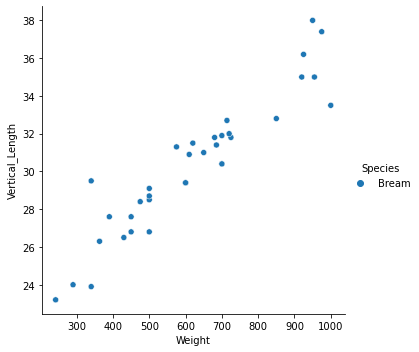

In [57]:
# create the same scatterplot as the previous cell, but only display data for the Bream species
sns.relplot(data=fish.query('Species == "Bream"'), kind='scatter', x='Weight', y='Vertical_Length', hue='Species')

## Create a linear model

In [58]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish.query('Species == "Bream"')
bream.head()

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [59]:
# split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(bream[['Cross_Length']], bream[['Weight']], test_size=0.3, random_state=25)

In [60]:
# create the model and fit the training data
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [61]:
# score the testing data
linearModel.score(x_test, y_test)

0.8710856874262025

In [62]:
# make the predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[615.28481559],
       [956.60615971],
       [928.93145614],
       [509.19845187],
       [606.0599144 ],
       [647.57196976],
       [753.65833348],
       [509.19845187],
       [758.27078407],
       [725.9836299 ],
       [868.96959838]])

## Plot the regression line

In [63]:
# join the predicted data with the original data
predicted = pd.DataFrame(y_predicted, columns=['Weight_Predicted'])

combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,Weight_Predicted,Cross_Length,Weight
0,615.284816,38.5,700.0
1,956.606160,45.9,975.0
2,928.931456,45.3,925.0
3,509.198452,36.2,475.0
4,606.059914,38.3,700.0


In [64]:
# melt the actual and predicted data
melted = pd.melt(combined, id_vars='Cross_Length', var_name='Weight_Type',value_vars=['Weight_Predicted', 'Weight'], value_name='Weight_Value')
melted.head()

,Cross_Length,Weight_Type,Weight_Value
0,38.5,Weight_Predicted,615.284816
1,45.9,Weight_Predicted,956.606160
2,45.3,Weight_Predicted,928.931456
3,36.2,Weight_Predicted,509.198452
4,38.3,Weight_Predicted,606.059914


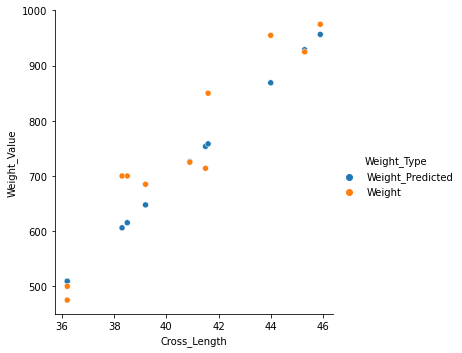

In [65]:
# use relplot() to plot the actual and predicted data
sns.relplot(data=melted, x='Cross_Length', y='Weight_Value', hue='Weight_Type')

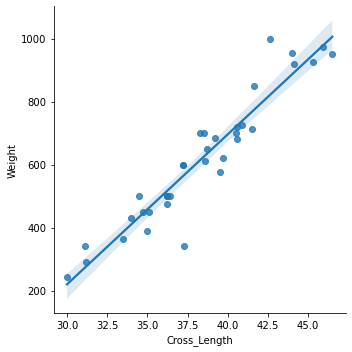

In [66]:
# use lmplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method
sns.lmplot(data=bream, x='Cross_Length', y='Weight')

## Plot the residuals

In [67]:
combined.head()

,Weight_Predicted,Cross_Length,Weight
0,615.284816,38.5,700.0
1,956.606160,45.9,975.0
2,928.931456,45.3,925.0
3,509.198452,36.2,475.0
4,606.059914,38.3,700.0


In [69]:
# calculate the residuals and store them in a column
combined['Residuals'] = combined['Weight'] - combined['Weight_Predicted']
combined.head()

,Weight_Predicted,Cross_Length,Weight,Residuals
0,615.284816,38.5,700.0,84.715184
1,956.606160,45.9,975.0,18.393840
2,928.931456,45.3,925.0,-3.931456
3,509.198452,36.2,475.0,-34.198452
4,606.059914,38.3,700.0,93.940086


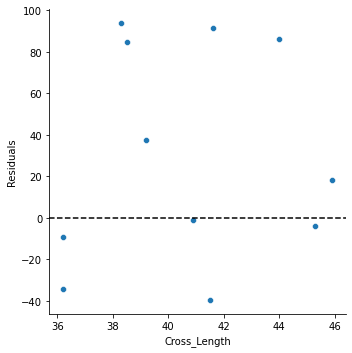

In [76]:
# use relplot() to create a scatterplot for the residuals
g = sns.relplot(data=combined, x='Cross_Length', y='Residuals')

# add a horizontal line at y=0 to the plot
for ax in g.axes.flat:
    ax.axhline(0, color='black', ls='--')

<AxesSubplot:xlabel='Cross_Length', ylabel='Weight'>

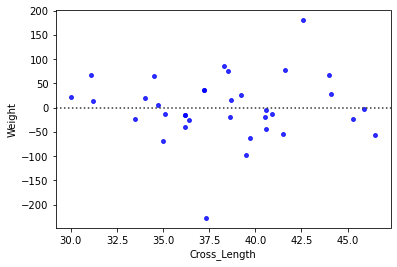

In [89]:
# use residplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method
sns.residplot(data=bream, x='Cross_Length', y='Weight', scatter_kws={'color':'blue', 's':15})